![SuperMarket](https://www.hashmicro.com/ph/blog/wp-content/uploads/2024/10/grocery-store-pos-system-HashMicro.webp)


#  Satış Analizi  📈



*Bu veri seti 2021 ve 2024 tarihleri arasında işlem verilerini, müşteri segmentasyonunu ve iade eğilimlerini kapsayan bir süpermarketin operasyonları hakkında ayrıntılı bilgi sağlar. Perakende dinamiklerine bütünsel bir bakış sunan Siparişler, Kişiler ve İadeler halinde yapılandırılmıştır.Bu veri kümesinin satış analizi ve müşteri davranışı trendlerinden geri dönüş oranı tahminleri ve ürün performansı değerlendirmesine kadar birçok farklı analizi destekleyecek verilere sahip olması nedeniyle oldukça faydalıdır.*

> *1. Veriyi Ön İzleme ve Tanıma*

In [1]:
# gerekli kütüphaneler
import numpy as np  # sayısal işlemler 
import pandas as pd  # veri manipülasyonu 
import seaborn as sns  # görselleştirme
import matplotlib.pyplot as plt  # görselleştirme

# görsel çıktılardaki uyarı mesajları için
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Veri setini yükleme
df1 = pd.read_csv(r"/kaggle/input/super-market-dataset/Sample - Superstore.csv")

In [3]:
#İlk 5 veri gözlemlenir.

df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,03-01-2021,07-01-2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,05-01-2021,12-01-2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## Analizin amacı nedir?

*Veri analizimizde amacımız müşteri segmentlerine göre kampanyalar belirlemektir. Bu kampanyalar doğrultusunda müşteri geri dönüşlerini azaltmak ve satışları arttırmak amaçlanmaktadır.Ayrıca uygulanan indirimlerin kar oranına ve satışa etkisi gözlemlenecektir.* 🎯

Veri setinin Kaggle [sayfası](https://www.kaggle.com/datasets/aditirai2607/super-market-dataset) için  tıklayınız.


*Orjinal veri setinin yapısını korumak için copy() metotu ile veri setinin yedeğini alıyoruz.*

In [4]:
df = df1.copy()


##  Veri Setine Genel Bakış

In [5]:
df.tail()  # verinin son 5 satırı

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
10189,10190,US-2024-143259,30-12-2024,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
10190,10191,US-2024-115427,30-12-2024,03-01-2025,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
10191,10192,US-2024-156720,30-12-2024,03-01-2025,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
10192,10193,US-2024-143259,30-12-2024,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
10193,10194,CA-2024-143500,30-12-2024,03-01-2025,Standard Class,HO-15230,Harry Olson,Consumer,Canada,Charlottetown,...,C0A,East,OFF-BI-10004040,Office Supplies,Binders,Wilson Jones Impact Binders,3.024,3,0.2,-0.6048


Verinin boyutuna baktığımızda 10194 satırdan ve 21 sütundan oluştuğunu görüyoruz.

In [6]:
df.shape

(10194, 21)

Veri yapıları incelendiğinde 3 adet float, 2 adet integer, ve 16 adet object veri tipi olduğu görünmektedir.

Veri setimizde boş değer bulunmamaktadır(Non-null).

In [7]:
df.nunique()

Row ID            10194
Order ID           5111
Order Date         1242
Ship Date          1338
Ship Mode             4
Customer ID         804
Customer Name       800
Segment               3
Country/Region        2
City                542
State/Province       59
Postal Code         654
Region                4
Product ID         1862
Category              3
Sub-Category         17
Product Name       1849
Sales              5837
Quantity             14
Discount             12
Profit             7334
dtype: int64

Bensersiz Row ID ve ve satır sayısı karşılaştırıldığında aynı değerleri aldığını gözlemlemekteyiz. Bunun sonucunda tekrarlı verilerin bulunmadı sonucuna ulaşırız.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10194 non-null  int64  
 1   Order ID        10194 non-null  object 
 2   Order Date      10194 non-null  object 
 3   Ship Date       10194 non-null  object 
 4   Ship Mode       10194 non-null  object 
 5   Customer ID     10194 non-null  object 
 6   Customer Name   10194 non-null  object 
 7   Segment         10194 non-null  object 
 8   Country/Region  10194 non-null  object 
 9   City            10194 non-null  object 
 10  State/Province  10194 non-null  object 
 11  Postal Code     10194 non-null  object 
 12  Region          10194 non-null  object 
 13  Product ID      10194 non-null  object 
 14  Category        10194 non-null  object 
 15  Sub-Category    10194 non-null  object 
 16  Product Name    10194 non-null  object 
 17  Sales           10194 non-null 

## Betimsel İstatistikler

Betimsel istatistikler, veri setindeki sayısal değerlerin ortalamadan ne kadar saptığını ve veri setinin özelliklerinin merkezi eğilimlerini ve dağılımlarını anlamamızı sağlar. Pandas kütüphanesinde, bu tür analizler için describe() metodu kullanılabilir. Bu metot, eksik değerleri göz ardı ederek yalnızca sayısal değişkenler üzerinde çalışır. Transpoz (.T) işlemiyle çıktıyı döndürerek daha farklı bir görünüm elde edebiliriz.

In [9]:

# Analiz edilecek sütunları seçme
df[["Sales", "Quantity", "Discount", "Profit"]].describe().T



,count,mean,std,min,25%,50%,75%,max
Sales,10194.0,228.225854,619.906839,0.444,17.2200,53.91,209.500000,22638.480
Quantity,10194.0,3.791838,2.228317,1.000,2.0000,3.00,5.000000,14.000
Discount,10194.0,0.155385,0.206249,0.000,0.0000,0.20,0.200000,0.800
Profit,10194.0,28.673417,232.465115,-6599.978,1.7608,8.69,29.297925,8399.976


Tabloda ilk gözümüze çarpan şey kazanç satırında eksi değerin bulunmasıdır. Bu bir çok nedenden kaynaklanabilir. Arz- talep dengesinde bozukluklar, satışa çıkan ürünlerde oluşan problemler, mevsimsel etkiler, ekonomik nedenler, müşteri memnuniyetsizliği,satışlarda uygulanan büyük indirimler veya promosyonlar, ürünlerin maliyetlerinin altına inmesine yol açabilir, ürünlerin depolanması veya taşınması için yapılan yüksek maliyetler, gibi bir çok olasılık mevcuttur. Nedeni saptamak adına kök neden analizi yapılarak korelasyonlara bakılıp daha nicel sonuçlar elde etmek mümkündür. 

Bir diğer parametre olan satışlarda minimum ve maksimum değerler arasında ciddi fark bulunmaktadır.
Bu satışların çok geniş bir aralığa yayıldığını gösterir. Yani, bazı ürünler veya işlemler çok düşük satışlarla yapılırken (yaklaşık 0.44), bazıları ise çok yüksek satışlara (22,638.48) ulaşmaktadır.
Bu tür büyük farklar genellikle veri setinde uç noktaların (outliers) varlığını gösterir


Şirketin, düşük satışları artırmak için stratejiler geliştirmesi gerekebilir ya da yüksek satışları desteklemek için belirli ürünlere veya kampanyalara daha fazla odaklanabilir..

**Değişkenlik Katsayısı**

Veri setindeki değişkenlerin varyasyonunu görmek için, değişkenlik katsayılarına bakacağız. Değişkenlik katsayısı (coefficient of variation), bir değişkenin varyasyonunu, standart sapmasının ortalamaya oranı olarak ölçen bir istatistiksel ölçüttür. Genellikle yüzde (%) olarak ifade edilir.

 ![Coefficient de variation (CV)![](https://learnsql.com/blog/statistical-queries-sql-measuring-spread-distribution/relative-standard-deviation.png)]

Genel olarak değişkenlik katsayısı ile verilerin dağılımının ne kadar homojen veya heterojen olduğunu, değişkenler arasındaki genel varyasyon seviyelerini görme Değişkenlik katsayısı yüksek olan veriler, ortalama etrafında daha fazla yayılım gösterir ve daha fazla risk veya belirsizlik içerir.

In [10]:
db = df[["Sales", "Quantity", "Discount", "Profit"]]
degiskenlik_katsayisi = db.std()/db.mean()
print(degiskenlik_katsayisi*100)

Sales       271.619901
Quantity     58.766135
Discount    132.734307
Profit      810.733906
dtype: float64


<Axes: >

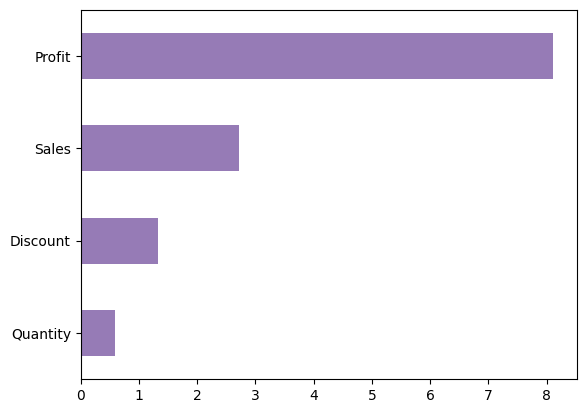

In [11]:
sirali_dk = degiskenlik_katsayisi.sort_values()
sirali_dk.plot.barh(x = 'Değişkenler', y = 'Değişkenlik Katsayısı', color = '#967bb6')

Tablodaki tüm değişkenlerin varyasyonu yüksektir fakat quantity değişkeni diğerlerine kıyasla daha tutarlı bir dağılım göstermektedir. Satış verileri oldukça değişken. Ortalama satış miktarına kıyasla büyük dalgalanmalar var.Kar verileri son derece değişken. Bu, bazı satışların çok zarar veya aşırı kâr getirdiğini gösterebilir.İndirim oranlarında çok yüksek bir değişkenlik var. Bazı durumlarda yüksek indirimler uygulanmış.

İndirim değişkenine göre verileri gruplayarak diğer özelliklerin İndirim değişkeni ile alakasına sezgisel olarak bakabiliriz.

In [12]:
db = df[["Sales", "Quantity", "Discount", "Profit"]]
db.groupby('Discount').agg(['std','mean','min','max'])

Sales                                    Quantity            \
                  std        mean       min         max       std      mean   
Discount                                                                      
0.00       646.669469  224.431226    0.9900  17499.9500  2.234723  3.811168   
0.10       704.067236  572.421844   29.4030   3785.2920  2.772970  3.927083   
0.15       542.848707  529.971567  102.8330   3406.6640  2.497359  3.807692   
0.20       474.191169  208.834160    1.3440  11199.9680  2.211561  3.738802   
0.30       434.360759  454.235074   37.2960   4416.1740  2.069355  3.717391   
0.32       517.704839  536.794770   67.9932   2396.2656  2.407254  3.888889   
0.40       957.204041  562.791101    2.9700   8399.9760  2.464951  3.811594   
0.45       281.888478  498.634000  174.0585    957.5775  1.972539  4.090909   
0.50      2917.844258  892.705152   32.9850  22638.4800  1.852171  3.651515   
0.60        68.848493   47.690872    1.8920    419.6800  1.834653  3.718121   
0.70       339.200300   96.238835    0.8520   4499.9850  2.233878  3.948113   
0.80       216.419213   56.412445    0.4440   2177.5840  2.281336  3.953488   

                      Profit                                    
         min max         std        mean        min        max  
Discount                                                        
0.00       1  14  254.630419   66.338799     0.0000  8399.9760  
0.10       1  14  129.077361   94.791354    -8.0980   679.9960  
0.15       1  13   60.746393   27.288298   -40.1960   225.7350  
0.20       1  14  117.143082   24.576350 -1049.3406  3919.9888  
0.30       1  14   67.627303  -45.710633  -630.8820   156.0470  
0.32       1  10  103.439178  -88.560656  -437.5404    -6.0196  
0.40       1  14  237.487863 -111.528378 -1862.3124  1119.9968  
0.45       1   7  137.543658 -226.646464  -458.1468   -76.6062  
0.50       1   9  547.455453 -310.703456 -3839.9904    -1.8295  
0.60       1   9   77.116908  -41.371458  -427.4500    -0.7566  
0.70       1  14  417.066696  -95.048521 -6599.9780    -0.5964  
0.80       1  14  356.197387 -101.545745 -3701.8928    -0.9452

Tabloya göre yüksek indirim oranlarında zarar etme olasılığı artıyor. Özellikle %50'nin üzerindeki indirim oranlarında minimum kar değerleri genellikle negatif.Yüksek indirim oranlarında satışların standart sapması artıyor. Bu, bazı ürünlerin indirimden çok faydalandığını (çok satıldığını) ancak bazılarının etkilenmediğini gösterebilir.Çok yüksek indirim oranları uzun vadede zarar ettirebilir. Orta düzeyde (örneğin %10-20 arası) indirimler, karı dengede tutarken satışları artırabilir.

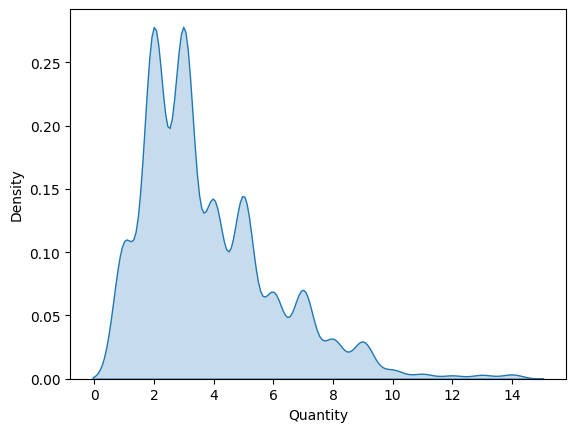

In [13]:
# kdeplot ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['Quantity'], fill = True);

## Kategorik Değişken Analizi 



Veri setinde object olarak belirtilen fakat kategorik değişkenler bulunmaktadır. Bunların tespit edilmesi ve veri türünün değiştirilmesi tutarlı ve doğru bir analiz için oldukça önem arz etmektedir.

In [14]:
# Kategorik sütunların benzersiz değer sayılarını bulma
unique_counts = df.loc[:, df.dtypes == "object"].nunique()
print(unique_counts)


Order ID          5111
Order Date        1242
Ship Date         1338
Ship Mode            4
Customer ID        804
Customer Name      800
Segment              3
Country/Region       2
City               542
State/Province      59
Postal Code        654
Region               4
Product ID        1862
Category             3
Sub-Category        17
Product Name      1849
dtype: int64


In [15]:
low_cardinality_columns = unique_counts[unique_counts < 10].index


df[low_cardinality_columns] = df[low_cardinality_columns].astype("category")


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Row ID          10194 non-null  int64   
 1   Order ID        10194 non-null  object  
 2   Order Date      10194 non-null  object  
 3   Ship Date       10194 non-null  object  
 4   Ship Mode       10194 non-null  category
 5   Customer ID     10194 non-null  object  
 6   Customer Name   10194 non-null  object  
 7   Segment         10194 non-null  category
 8   Country/Region  10194 non-null  category
 9   City            10194 non-null  object  
 10  State/Province  10194 non-null  object  
 11  Postal Code     10194 non-null  object  
 12  Region          10194 non-null  category
 13  Product ID      10194 non-null  object  
 14  Category        10194 non-null  category
 15  Sub-Category    10194 non-null  object  
 16  Product Name    10194 non-null  object  
 17  Sales       

<Axes: xlabel='Category', ylabel='Sales'>

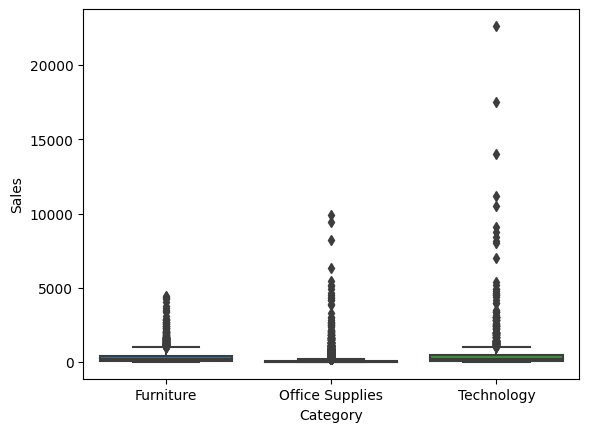

In [17]:

sns.boxplot(x='Category', y='Sales', data=df)

Office Supplies kategorisi, satışların çoğunluğunu oluşturuyor gibi görünüyor; diğer kategorilere göre daha düzenli bir dağılıma sahip.
Technology kategorisinde hem çok yüksek satışlar hem de birçok düşük satış var; bu da büyük bir çeşitlilik ve potansiyel dengesizlik anlamına gelebilirAykırı değerler çok fazla..
Furniture kategorisi daha tutarlı bir dağılım gösteriyor ancak çok yüksek satış değerlerine ulaşmamı


Technology kategorisinde büyük satışları artırmaya yönelik stratejiler geliştirilebilir,örneğin indirim,promosyon kampanyaları gibi satış stratejileri uygulanabilir, ancak düşük satışların nedenleri de analiz edilmeli.ş.

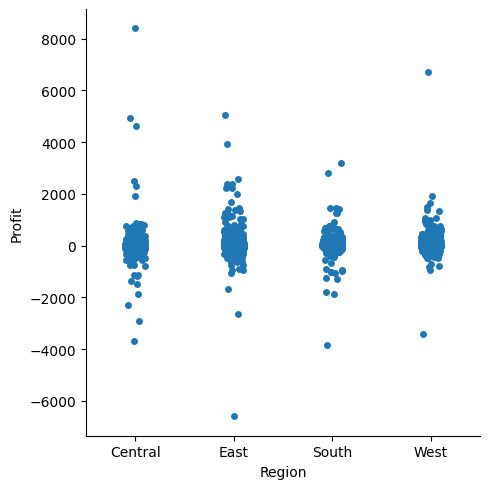

In [18]:
sns.catplot(data = df,
            x = "Region",
            y = "Profit");

Tüm bölgelerde kar dağılımı benzer bir desen sergiliyor, ancak bazı bölgelerde istisnai kar veya zarar durumları var.
Southt bölgesi, daha dengeli bir kar dağılımına sahip gibi görünüyor

.
Aşırı değerler (outlier) olan noktalar, satış süreçlerinde farklı bir dinamik veya belirli ürün gruplarında anormal bir durum olduğunu gösterebilir.

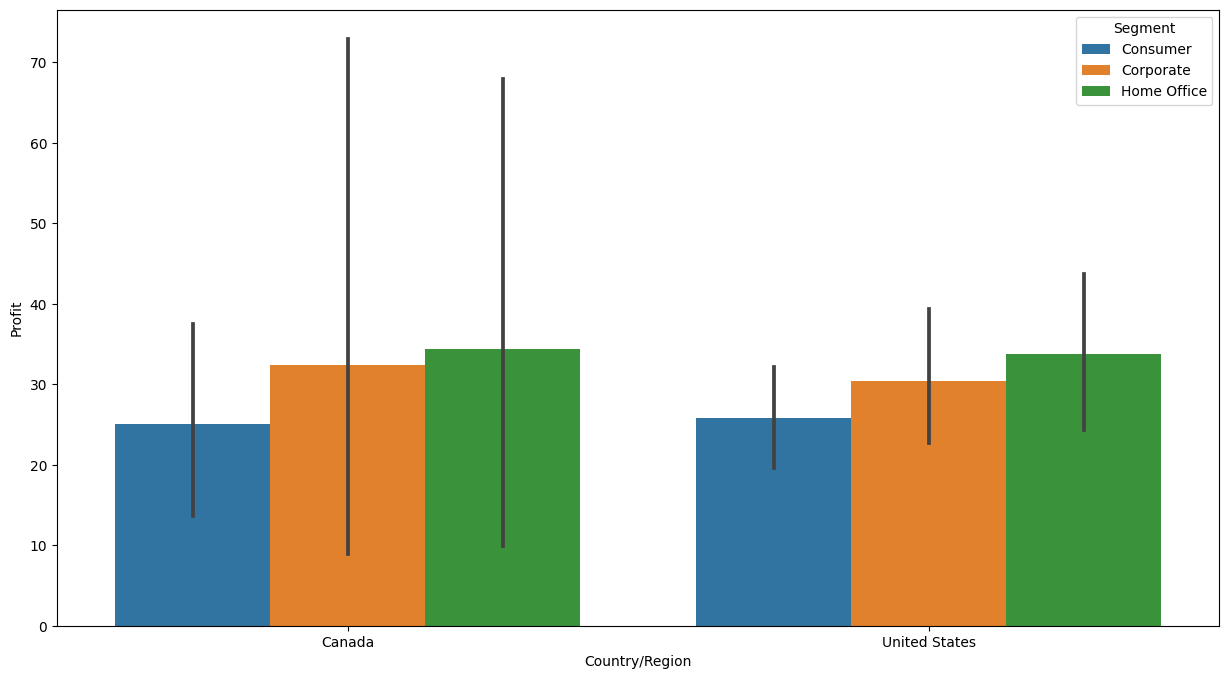

In [19]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "Country/Region",
            y = "Profit",
            hue = "Segment");

Tabloya baktığımızda iki ülkenin ürün bazında kar sıralamaları aynı olmaktadır. İki ülkede de en çok satış yapılan ürün grubu home office grubudur. Fakat United States, Canada'ya göre daha tutarlı bir kar yapısına sahiptir.

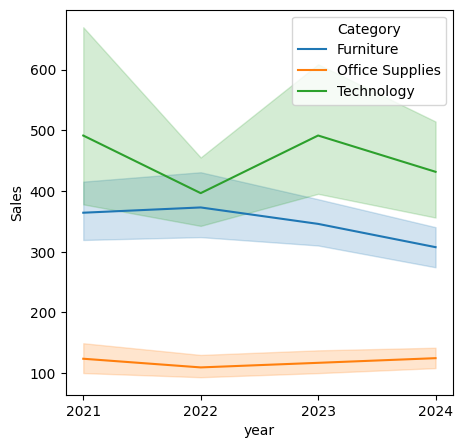

In [20]:
# Çizgi grafik ile numerik değişkenlerin tarihsel olarak değişimini gözlemleyebiliriz.
df["Order Date"] =df["Order Date"].astype("datetime64[ns]")
df["year"]= df["Order Date"].dt.strftime("%Y")
plt.figure(figsize = (5, 5))
sns.lineplot(data = df,
             x = "year",
             y = "Sales",
             hue = "Category");


Grafiğe baktığımızda ofis malzemelerinin genellikle aynı seviyede satış düzeyine sahip olduğu görülmektedir.2022 itibariyle hafif bir artış görülmekle birlikte pandemi sonrası ofise dönüş etkisi olabilir. 2022 yılının sonuna kadar devam eden pandeminin etkisi ışığında oluşan ekonomik krizin etkisiyle birlikte teknolojik aletlerin satışında düşüş görülmektedir. Mobilya kategorisinde durum tam tersi olup satışlar artmıştır. Pandemi bitimiyle birlikte satışlar yükselmiş olup, 2023 yılında oluşan dünya geneli enflasyondan etkilenmesi muhtemel olan satışlarda düşüş mevcuttur. 

## Aykırı Değer Analizi (Outliers)

Aykırı değerlerin analizi, tıpkı eksik verilerde olduğu gibi dikkatli bir şekilde ele alınmalıdır. Veri setinde aykırı değerlerin bulunması, dağılımları etkileyerek tahmin modellerinin genelleme yeteneğini düşürebilir. Bu nedenle, aykırı değerlerle çalışırken doğru yöntemlerin seçilmesi önemlidir.

Aykırı değerlerin tespit ve analizi için sektörel bilgiye dayalı değerlendirmeler, standart sapma yöntemi, Z-skoru analizi ve IQR (çeyrekler arası aralık) yöntemi gibi çeşitli tekniklerden faydalanılabilir.

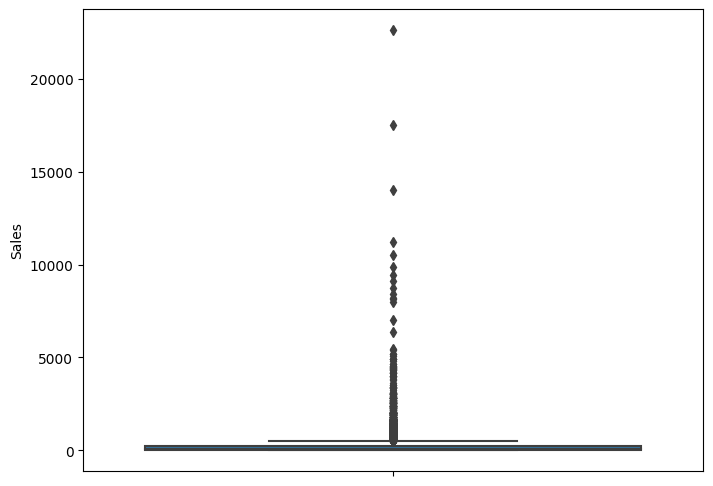

In [21]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["Sales"],
            orient = "v");

In [22]:
Sales = df['Sales']
Sales

0         16.448
1          3.540
2         11.784
3        272.736
4         19.536
          ...   
10189     52.776
10190     20.720
10191      3.024
10192     90.930
10193      3.024
Name: Sales, Length: 10194, dtype: float64

In [23]:
# Quantile değerlerin belirlenmesi.
Q1 = Sales.quantile(0.25)
Q3 = Sales.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

17.22
209.5
192.28


In [24]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = Sales[Sales > upper_fence].index

outlier_idx

Index([    5,     8,    12,    22,    29,    30,    31,    43,    59,   102,
       ...
       10072, 10085, 10091, 10107, 10120, 10121, 10137, 10149, 10169, 10172],
      dtype='int64', length=1183)

In [25]:
Sales[Sales > upper_fence]

5        2573.820
8         609.980
12        755.960
22        545.940
29        572.580
           ...   
10121    2879.952
10137     629.100
10149     750.680
10169     725.840
10172    1207.840
Name: Sales, Length: 1183, dtype: float64

In [26]:
df_del = df[~(Sales > upper_fence)]

df_del

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
0,1,US-2021-103800,2021-03-01,07-01-2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2021
1,2,US-2021-112326,2021-04-01,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2021
2,3,US-2021-112326,2021-04-01,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2021
3,4,US-2021-112326,2021-04-01,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2021
4,5,US-2021-141817,2021-05-01,12-01-2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,10190,US-2024-143259,2024-12-30,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,2024
10190,10191,US-2024-115427,2024-12-30,03-01-2025,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,2024
10191,10192,US-2024-156720,2024-12-30,03-01-2025,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,2024
10192,10193,US-2024-143259,2024-12-30,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,2024


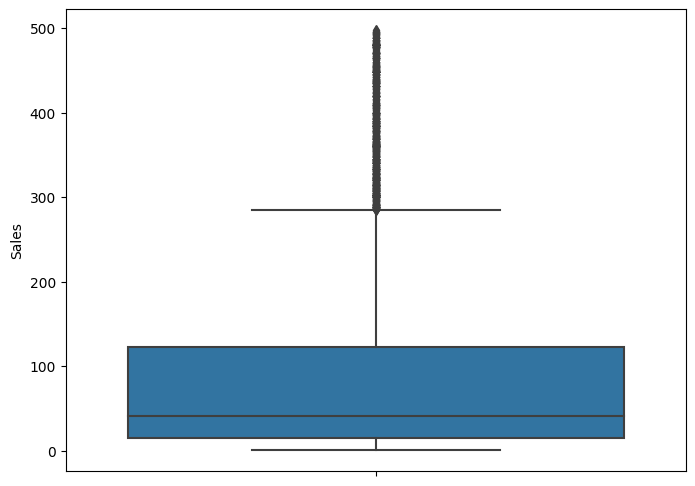

In [27]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["Sales"],
            orient = "v");

### Aykırı Gözlemlerin Doldurulması

-Ortalama değer ile doldurma

In [28]:
df.loc[Sales > upper_fence, "Sales"] = Sales.mean()

In [29]:
df.loc[Sales > upper_fence, "Sales"]

Series([], Name: Sales, dtype: float64)

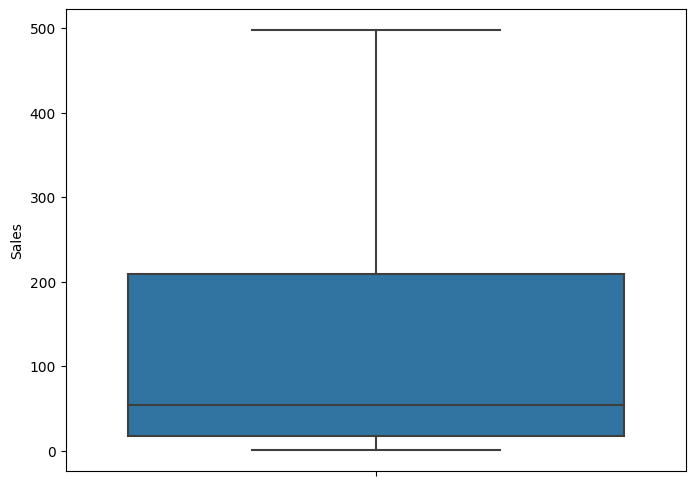

In [30]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["Sales"],
            orient = "v");

-Baskılama yöntemi ile doldurma(capping)

In [31]:
df = df1.copy()

In [32]:
df.loc[Sales > upper_fence, "Sales"] = upper_fence

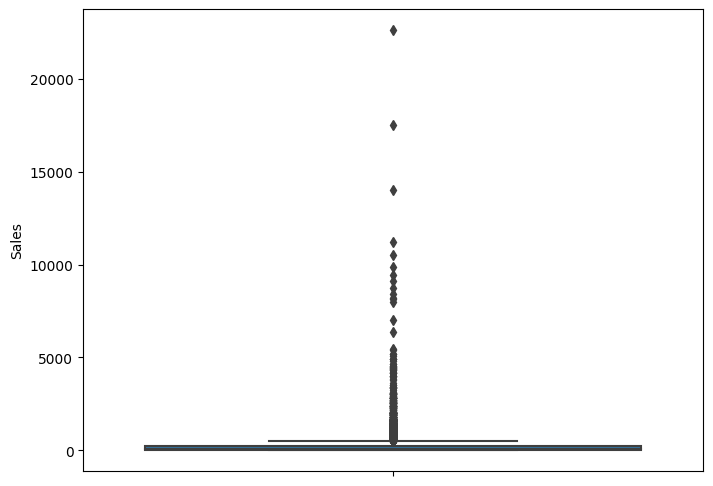

In [33]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["Sales"],
            orient = "v");

Grafiğimiz satış verilerinin büyük bir kısmının düşük değerlerde yoğunlaştığını, ancak üst tarafa doğru geniş bir aralık olduğunu gösteriyor. Aykırı değerler bulunmamakla birlikte, satış değerleri arasındaki farklar dikkat çekici bir dağılım sunuyor.

Müşterilerin büyük çoğunluğu düşük satış seviyelerinde yer alıyor. Bu durum, geniş bir müşteri kitlesine sahip olunduğunu ama büyük gelirlerin az sayıda müşteriden geldiğini gösterebilir (Pareto Prensibi - %80 gelir %20 müşteriden).
Üst sınırda yer alan müşteriler işletme için kritik öneme sahiptir ve özel stratejilerle elde tutulmalıdır.

## Feature Engineering

In [34]:
#Satışlara göre müşteri segmentasyonu yapabiliriz

def Sales_range(Sales):
    if Sales < 500:
        return "low_level"
    elif 500<= Sales < 2000:
        return "medium_level"
    else:
        return "high_level"

df['Sales_range'] = df['Sales'].apply(Sales_range)

df.tail(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_range
10191,10192,US-2024-156720,30-12-2024,03-01-2025,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,low_level
10192,10193,US-2024-143259,30-12-2024,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,low_level
10193,10194,CA-2024-143500,30-12-2024,03-01-2025,Standard Class,HO-15230,Harry Olson,Consumer,Canada,Charlottetown,...,East,OFF-BI-10004040,Office Supplies,Binders,Wilson Jones Impact Binders,3.024,3,0.2,-0.6048,low_level


Low level satışlar için fiyat indirimleri, ürün tanıtımları ve sadakat programları uygulanabilir. Medium level satışlar için bundle teklifler, özel indirimler ve müşteri eğitimleri önerilir. High level satışlar için lüks ürünler, özel müşteri ilişkileri yönetimi ve yeni ürün duyuruları uygulanabilir. Bu politikalar, her segmentin farklı ihtiyaçlarına ve bütçelerine göre uyarlanabilir.